In [1]:
%matplotlib inline

import numpy as np
import imageio
import matplotlib.pyplot as plt
import pandas as pd 

In [5]:
im = imageio.imread(".\\imagesPCA\\s3\\3.pgm")
im = im.astype(np.uint8) # Tipo de número que tiene dentro

print(im)

[[101 106 102 ... 108 107 108]
 [101 104 102 ... 106 108 105]
 [ 99 104 102 ... 108 106 111]
 ...
 [ 64  69  75 ...  42  48  48]
 [ 74  81  85 ...  46  48  44]
 [ 77  83  84 ...  46  50  45]]


In [7]:
# Máximo y mínimo de nuestra matriz

print('Max original', end = ' ')
print(np.amax(im))
print('Min original', end = ' ')
print(np.amin(im))

Max original 204
Min original 10


In [8]:
im_original = im

im = im /255

print('Max original', end = ' ')
print(np.amax(im))
print('Min original', end = ' ')
print(np.amin(im))

Max original 0.8
Min original 0.0392156862745098


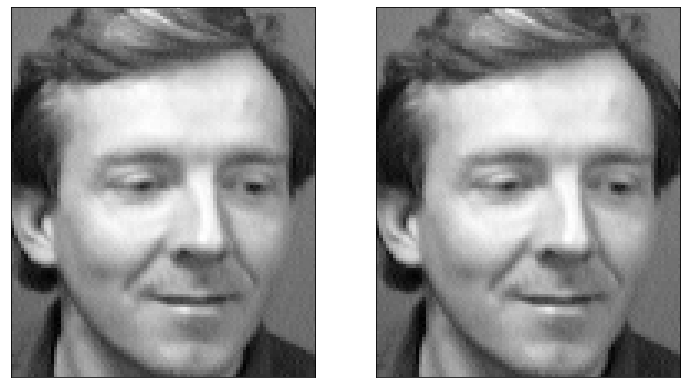

In [9]:
fix, ax = plt.subplots(1,2, figsize = (12, 12),
                       subplot_kw = {'xticks' : [], 'yticks': []})

ax[0].imshow(im_original, cmap= "gray")
ax[1].imshow(im_original, cmap= "gray")

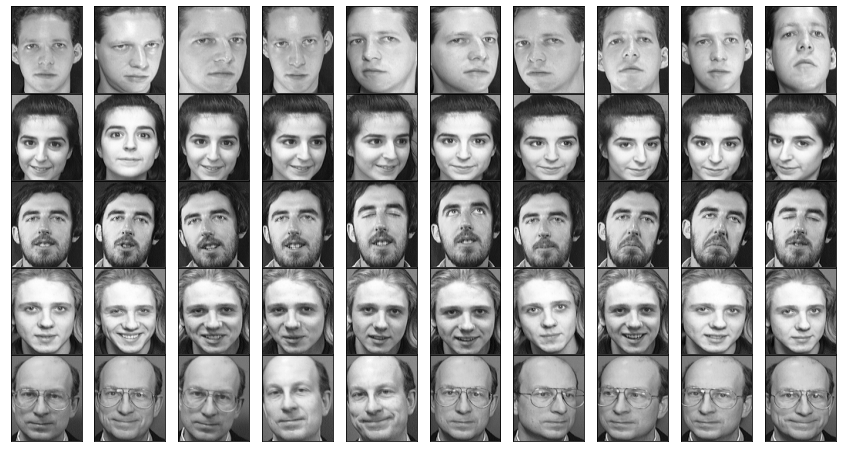

In [20]:
#Codigo para organizar imagenes y preparar el entorno

from glob import iglob

caras = pd.DataFrame([]) # Guardamos los datos de cada una de las imagenes

for path in iglob(".\\imagesPCA\\*\\*.pgm"):
    im = imageio.imread(path)
    cara = pd.Series(im.flatten(), name=path)
    caras = caras.append(cara)
    
fig, axes = plt.subplots(5,10, figsize = (15, 8),
                       subplot_kw = {'xticks' : [], 'yticks': []},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras.iloc[i].values.reshape(112,92), cmap = "gray")

In [22]:
# Usar sklearn y tener muy en cuenta la sintaxis 

from sklearn.decomposition import PCA

In [27]:
caras_pca = PCA(n_components = 0.5)

caras_pca.fit(caras)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

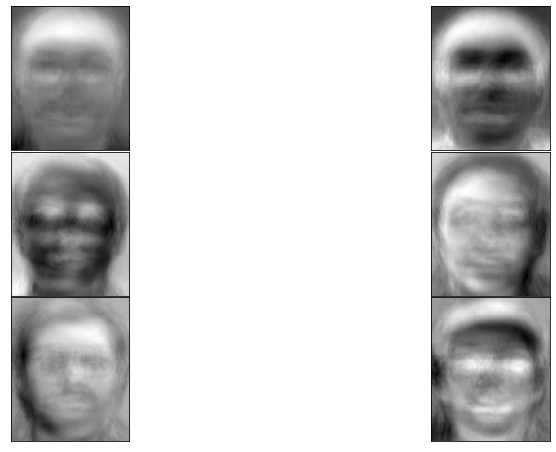

In [30]:
filas = 3 
columnas = caras_pca.n_components_ // filas

fig, axes = plt.subplots(filas,columnas, figsize = (15, 8),
                       subplot_kw = {'xticks' : [], 'yticks': []},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras_pca.components_[i].reshape(112,92), cmap = "gray") # Tener muy en cuenta la sintaxis 

In [31]:
print(caras_pca.n_components_)

6


In [34]:
componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)

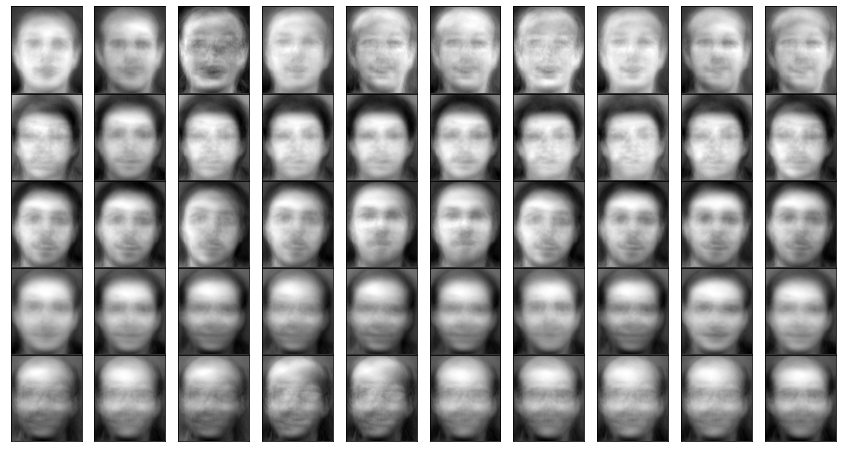

In [35]:
fig, axes = plt.subplots(5,10, figsize = (15, 8),
                       subplot_kw = {'xticks' : [], 'yticks': []},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(112,92), cmap = "gray") # Tener muy en cuenta la sintaxis 

In [36]:
# Ahora lo veremos con el 80% de la información

caras_pca = PCA(n_components = 0.8)

caras_pca.fit(caras)

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

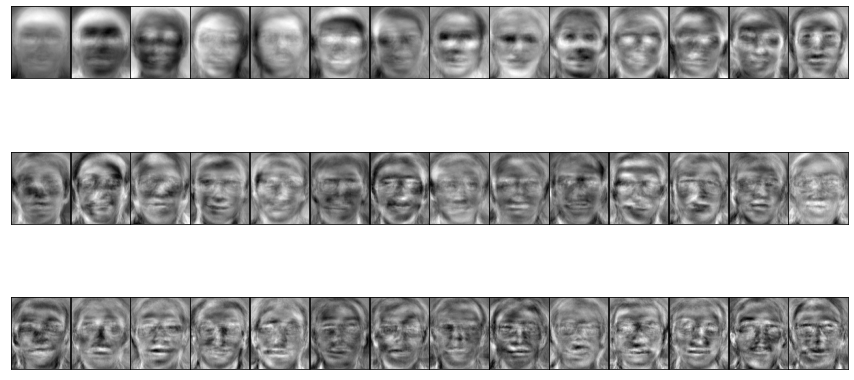

In [37]:
filas = 3 
columnas = caras_pca.n_components_ // filas

fig, axes = plt.subplots(filas,columnas, figsize = (15, 8),
                       subplot_kw = {'xticks' : [], 'yticks': []},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras_pca.components_[i].reshape(112,92), cmap = "gray") # Tener muy en cuenta la sintaxis 

In [38]:
print(caras_pca.n_components_)

44


In [40]:
componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)

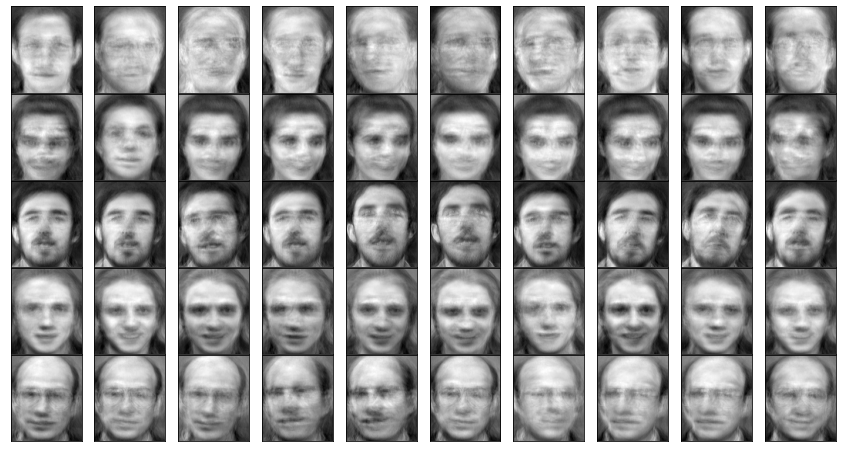

In [42]:
# Ahora es más notorio quién es quién, con el 80% de la información, solo 44 componentes

fig, axes = plt.subplots(5,10, figsize = (15, 8),
                       subplot_kw = {'xticks' : [], 'yticks': []},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(112,92), cmap = "gray") # Tener muy en cuenta la sintaxis 

In [45]:
# Ahora lo veremos con el 99% de la información, veremos que el tiempo de computación es más elevado para obtener la misma información 

caras_pca = PCA(n_components = 0.99)

caras_pca.fit(caras)

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

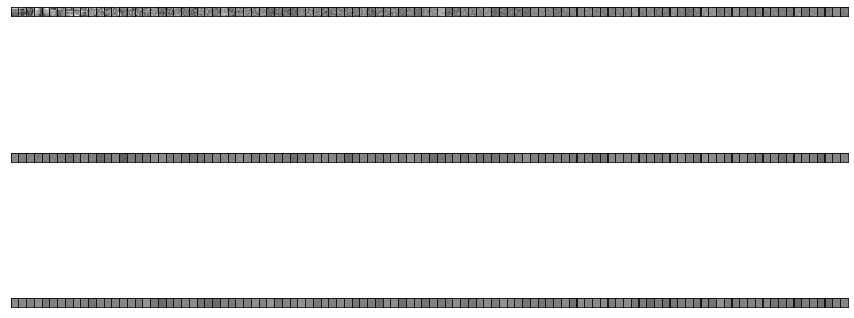

In [44]:
filas = 3 
columnas = caras_pca.n_components_ // filas

fig, axes = plt.subplots(filas,columnas, figsize = (15, 8),
                       subplot_kw = {'xticks' : [], 'yticks': []},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras_pca.components_[i].reshape(112,92), cmap = "gray") # Tener muy en cuenta la sintaxis 

In [46]:
print(caras_pca.n_components_)

325


In [47]:
componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)

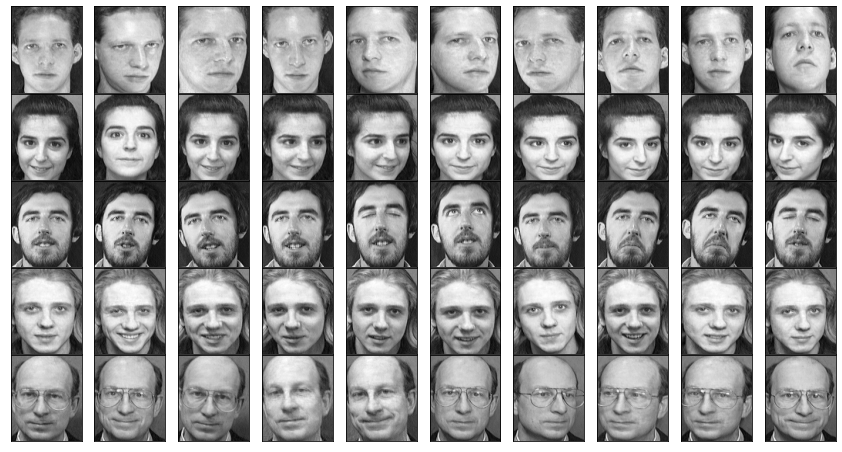

In [49]:
# Ahora es más notorio quién es quién, con el 99% de la información, con 325 componentes

fig, axes = plt.subplots(5,10, figsize = (15, 8),
                       subplot_kw = {'xticks' : [], 'yticks': []},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(112,92), cmap = "gray") # Tener muy en cuenta la sintaxis 